<a href="https://colab.research.google.com/github/BRSHD/spam-classifier/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных и EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import re

# Загрузка данных
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spamclassifier/spamdataset.csv", encoding="latin-1")

# Первичный осмотр
print("Размер данных:", df.shape)
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика:")
print(df.describe())

Размер данных: (5572, 5)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Статистика:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   



In [3]:
df = df[["v1", "v2"]]
df.columns = ["label", "text"]

print(f"Всего сообщений: {len(df):,}")
print(f"Не спам (ham): {sum(df['label'] == 'ham'):,} ({sum(df['label'] == 'ham')/len(df)*100:.1f}%)")
print(f"Спам (spam): {sum(df['label'] == 'spam'):,} ({sum(df['label'] == 'spam')/len(df)*100:.1f}%)")

Всего сообщений: 5,572
Не спам (ham): 4,825 (86.6%)
Спам (spam): 747 (13.4%)


In [4]:
# Проверим пропущенные значения
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
label    0
text     0
dtype: int64


In [5]:
# Посмотрим распределение классов
print("\nРаспределение классов:")
print(df["label"].value_counts())
print(f'\nСоотношение спам/не спам: {df["label"].value_counts(normalize = True)}')



Распределение классов:
label
ham     4825
spam     747
Name: count, dtype: int64

Соотношение спам/не спам: label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Распределение сообщений')

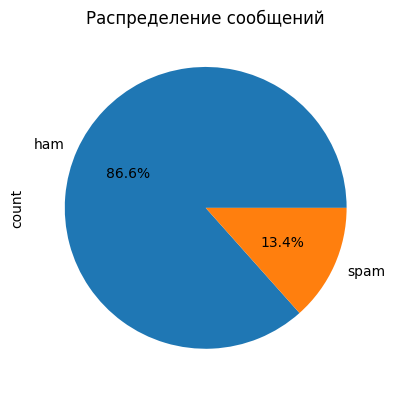

In [6]:
plt.figure(figsize = (10, 6))

# Круговой график
plt.subplot(1, 2, 1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Распределение сообщений')

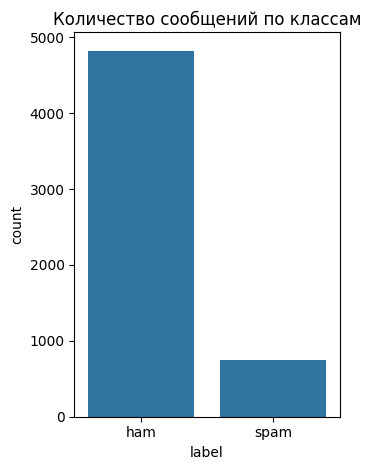

In [7]:
# Столбчатый график
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'label')
plt.title('Количество сообщений по классам')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Распределение длины сообщений')

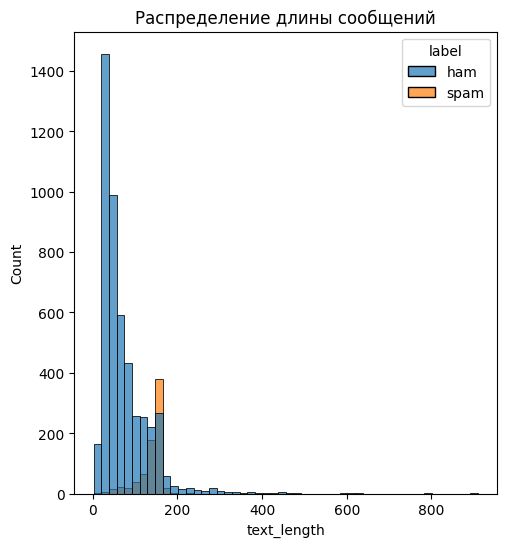

In [8]:
# Добавим длину сообщений
df['text_length'] = df['text'].apply(len)

plt.figure(figsize = (12, 6))

# Распределение длины сообщений
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'text_length', hue='label', bins=50, alpha=0.7)
plt.title('Распределение длины сообщений')

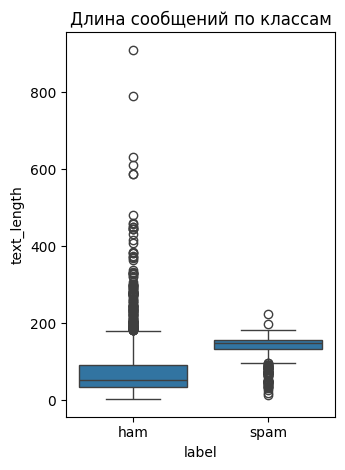

In [10]:
# Boxplot по классам
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Длина сообщений по классам')
plt.tight_layout()
plt.show()

In [11]:
# Статистика по длине
print("\nСтатистика длины сообщений:")
print(df.groupby('label')['text_length'].describe())


Статистика длины сообщений:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


In [14]:
# Функция для анализа слов
def analyze_words(text_series, label):
  all_words = ' '.join(text_series).lower().split()

  # Удалим пунктуацию и специальные символы
  words_clean = [re.sub(r'[^\w\s]', '', word) for word in all_words]
  words_clean = [word for word in words_clean if word]

  word_freq = Counter(words_clean)
  return word_freq.most_common(20)

# Топ слова для спама
spam_words = analyze_words(df[df['label'] == 'spam']['text'], 'spam')
print("Топ 20 слов в СПАМЕ:")
for word, count in spam_words:
  print(f'{word}: {count}')

# Топ слова для не спама
ham_words = analyze_words(df[df['label'] == 'ham']['text'], 'ham')
print("\nТоп 20 слов в НЕ СПАМЕ:")
for word, count in ham_words:
    print(f"{word}: {count}")

Топ 20 слов в СПАМЕ:
to: 686
a: 376
call: 347
you: 287
your: 263
free: 216
the: 204
for: 203
now: 189
or: 188
2: 173
is: 158
txt: 150
u: 147
on: 144
ur: 144
have: 135
from: 128
mobile: 123
and: 122

Топ 20 слов в НЕ СПАМЕ:
i: 2185
you: 1837
to: 1554
the: 1118
a: 1052
u: 972
and: 848
in: 811
me: 756
my: 743
is: 728
it: 590
of: 524
for: 501
that: 486
im: 449
have: 438
but: 418
your: 414
so: 412


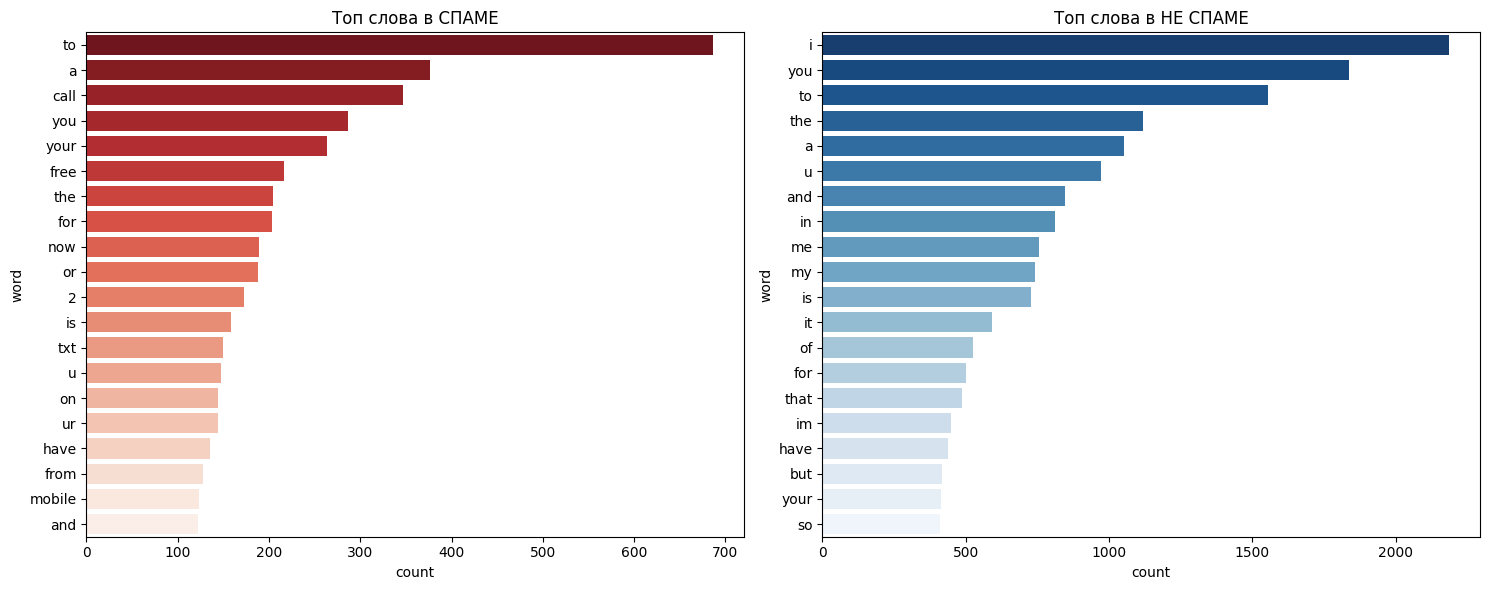

In [23]:
# Визуализация топ слов
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))

# Спам слова
spam_df = pd.DataFrame(spam_words, columns = ['word', 'count'])
sns.barplot(data = spam_df, x = 'count', y = 'word', ax = ax1, palette='Reds_r', hue = 'word')
ax1.set_title('Топ слова в СПАМЕ')

# Не спам слова
ham_df = pd.DataFrame(ham_words, columns=['word', 'count'])
sns.barplot(data=ham_df, x='count', y='word', ax=ax2, palette='Blues_r', hue = 'word')
ax2.set_title('Топ слова в НЕ СПАМЕ')

plt.tight_layout()
plt.show()

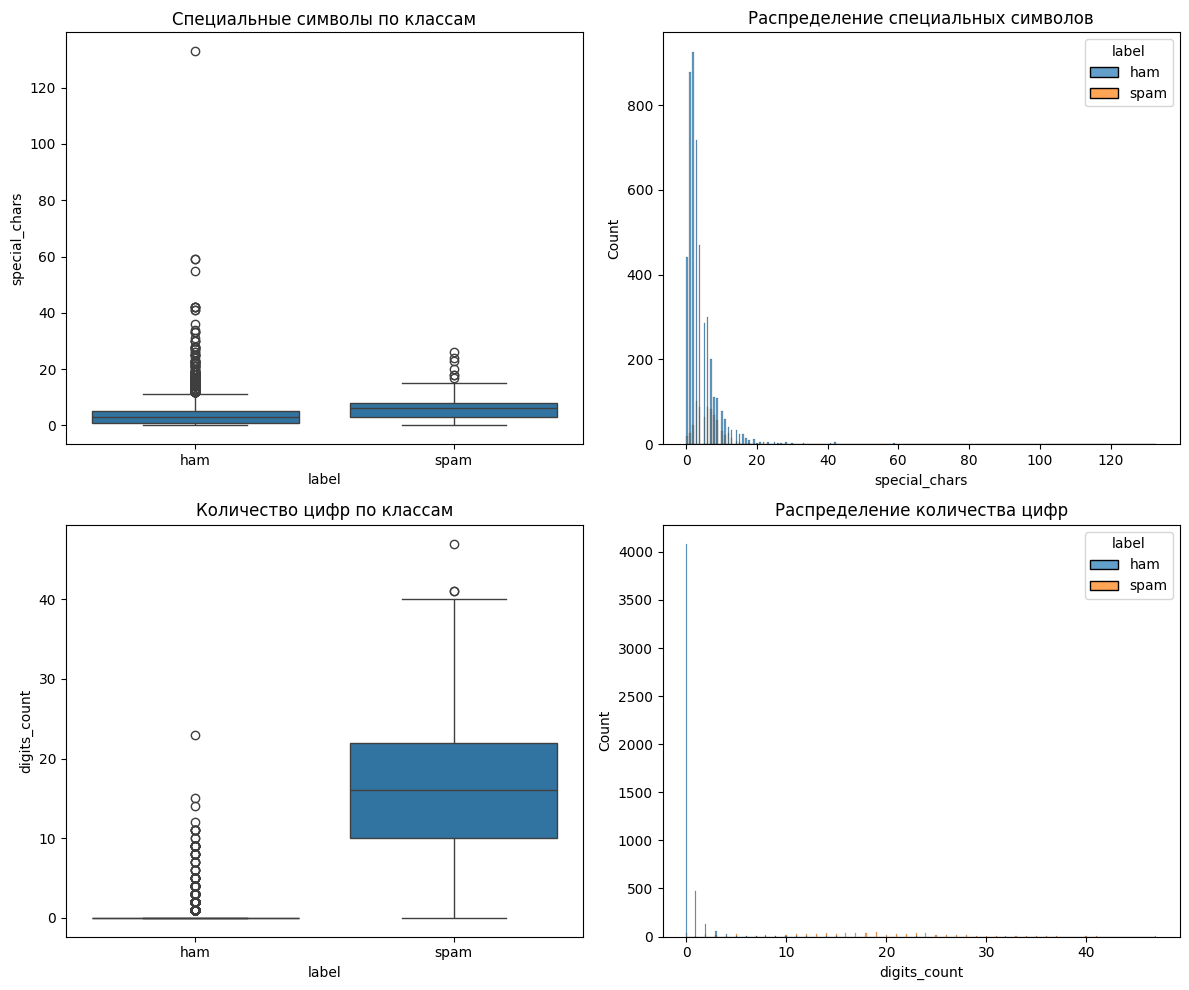

In [25]:
# Функция для подсчета специальных символов
def count_special_chars(text):
  return len(re.findall(r'[^\w\s]', text))

def count_digits(text):
  return len(re.findall(r'\d', text))

df['special_chars'] = df['text'].apply(count_special_chars)
df['digits_count'] = df['text'].apply(count_digits)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

# Специальные символы
sns.boxplot(data = df, x = 'label', y = 'special_chars', ax = axes[0,0])
axes[0,0].set_title('Специальные символы по классам')

sns.histplot(data=df, x='special_chars', hue='label', ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Распределение специальных символов')

# Цифры
sns.boxplot(data=df, x='label', y='digits_count', ax=axes[1,0])
axes[1,0].set_title('Количество цифр по классам')

sns.histplot(data=df, x='digits_count', hue='label', ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Распределение количества цифр')

plt.tight_layout()
plt.show()

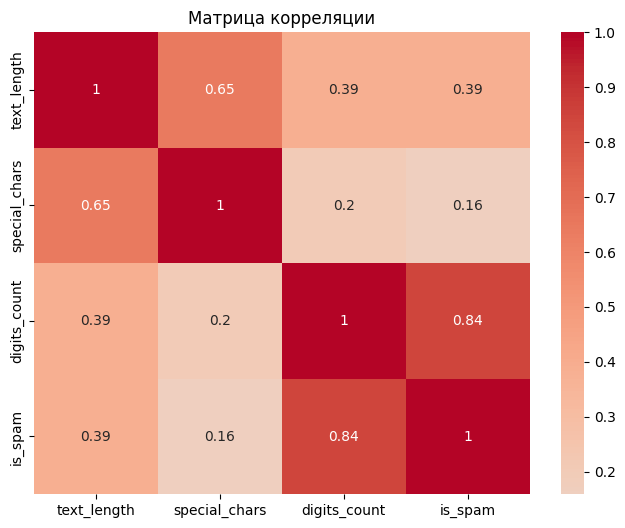

In [27]:
# Создадим числовые признаки для корреляции
df['is_spam'] = (df['label'] == 'spam').astype(int)

# Матрица корреляции
corr_matrix = df[['text_length', 'special_chars', 'digits_count', 'is_spam']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Матрица корреляции')
plt.show()

# Удаление стоп-слов и лемматизация

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def prepocessor_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()

  words = text.split()
  words = [word for word in words if word not in stop_words]
  words = [lemmatizer.lemmatize(word) for word in words]

  return ' '.join(words)

df['cleaned_text'] = df['text'].apply(prepocessor_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
